In [1]:
import pandas as pd

df = pd.read_csv('trainData.csv')  

SPLIT THE DATA 

In [6]:
#remove the price from the columns
X =df.drop(columns = ['price'])
y= df['price']



In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=43,test_size= 0.2)

BUILDING OUR MODEL FOR PREDICTION using RandforestRegressor

In [ ]:

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


MODEL EVALUATION 

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
#checking the accuracy score
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_pred,y_test)
R2 = r2_score(y_test,y_pred)


#output the accuracy
print('mean_squared_error: ', MSE)
print('mean_absolute_error: ',MAE)
print('r2_score',R2)

mean_squared_error:  24129846112.514088
mean_absolute_error:  120323.29563185085
r2_score 0.4779642957784498


BUILD A MODEL WITH XBGREGRESSOR

In [22]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("XGBRegressor")



#EVALUATION OF THE MODEL
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
#checking the accuracy score
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_pred,y_test)
R2 = r2_score(y_test,y_pred)


#output the accuracy
print('mean_squared_error: ', MSE)
print('mean_absolute_error: ',MAE)
print('r2_score',R2)

XGBRegressor
mean_squared_error:  25914742621.011806
mean_absolute_error:  121960.18385536152
r2_score 0.43934905963349324


HYPERRAMENTER TUNING

In [24]:
from sklearn.model_selection import RandomizedSearchCV


#this improves accuracy and avoid overfitting or underfitting
params = {
    'n_estimators': [100,200,300],
    'learning_rate':[0.01,0.01],
    'max_depth':[3,6,9]
}
RSV = RandomizedSearchCV(XGBRegressor(),param_distributions=params,cv=3,n_iter=5)
RSV.fit(X_train,y_train)
print(RSV.best_params_)



{'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.01}


SUMMARY:
these are good results n_estmatores is 200 bossting rounds - enough to learn patterns
max-depth = 6 not to shallow or underfitting which is perfect for complex but not huge dataset
learning rate= 0.01 , very small learning rate which usually leads to better generalization

C0MPRASION OF ACTAUL PRICE VS PREDICTED HOUSE PRICE

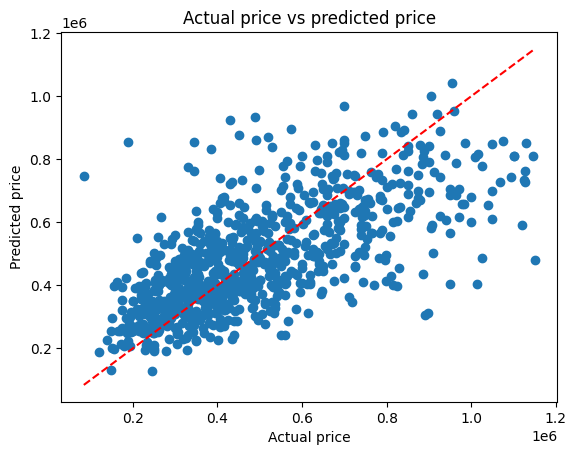

In [29]:
import matplotlib.pyplot as plt 


#visualizing the acctual price and predicted price
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.title('Actual price vs predicted price')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

plt.show()

SAVE THE MODEL

In [30]:
import pickle
with open('house_price_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)